In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and read the dataset

dataset = pd.read_csv('promo_order_data.csv')
dataset

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,2021-05-31,17,18.0,16.0,18.0,358.60,0.0,NaN,2.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,18.0
2481,2021-05-31,18,10.0,10.0,10.0,380.60,0.0,NaN,0.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0
2482,2021-05-31,19,4.0,4.0,4.0,69.00,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2483,2021-05-31,20,4.0,4.0,4.0,17.60,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0


In [3]:
# Drop the the promo_amount column since it contains many missing values and as per instruction, this will be disregarded

dataset = dataset.drop('promo_amount', axis = 1)
dataset

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,2021-05-31,17,18.0,16.0,18.0,358.60,0.0,2.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,18.0
2481,2021-05-31,18,10.0,10.0,10.0,380.60,0.0,0.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0
2482,2021-05-31,19,4.0,4.0,4.0,69.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2483,2021-05-31,20,4.0,4.0,4.0,17.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0


In [4]:
# Count the number of missing values on each columns

dataset.isnull().sum()

trans_date          0
trans_hour          0
customers           0
vendors             0
orders              0
amount              0
promo_count         0
Android            30
GCF                30
Macintosh          30
Tablet             30
Windows            30
X11                30
iPhone             30
Blacklisted         0
Not Blacklisted     0
dtype: int64

In [5]:
# Get the mean of Android column

avg_android = dataset['Android'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['Android'].fillna(avg_android, inplace = True)

In [6]:
# Get the mean of GCF column

avg_gcf = dataset['GCF'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['GCF'].fillna(avg_gcf, inplace = True)

In [7]:
# Get the mean of Macintosh column

avg_mac = dataset['Macintosh'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['Macintosh'].fillna(avg_mac, inplace = True)

In [8]:
# Get the mean of Tablet column

avg_tab = dataset['Tablet'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['Tablet'].fillna(avg_tab, inplace = True)

In [9]:
# Get the mean of Windows column

avg_win = dataset['Windows'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['Windows'].fillna(avg_win, inplace = True)

In [10]:
# Get the mean of X11 column

avg_x11 = dataset['X11'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['X11'].fillna(avg_x11, inplace = True)

In [11]:
# Get the mean of iPhone column

avg_iPhone = dataset['iPhone'].astype('float').mean(axis = 0)

# Replace the missing values with the mean

dataset['iPhone'].fillna(avg_iPhone, inplace = True)

In [12]:
# Recheck if there are still missing values

dataset.isnull().sum()

trans_date         0
trans_hour         0
customers          0
vendors            0
orders             0
amount             0
promo_count        0
Android            0
GCF                0
Macintosh          0
Tablet             0
Windows            0
X11                0
iPhone             0
Blacklisted        0
Not Blacklisted    0
dtype: int64

In [13]:
# View the statistical summary of the data

dataset.describe()

,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,12.748893,1368.490946,388.434608,1391.750503,10501.810254,28.863581,76.957230,24.561303,1.492464,0.802444,3.137271,4.015479,414.123829,0.123139,1368.367807
std,4.803603,2004.241830,408.808706,2035.524228,13429.995228,52.014765,107.461701,27.311516,2.540779,1.618033,4.690104,5.254375,572.802606,0.516366,2004.155656
min,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,9.000000,28.000000,20.000000,28.000000,625.800000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,28.000000
50%,13.000000,474.000000,254.000000,482.000000,4485.200000,4.000000,28.000000,12.000000,0.000000,0.000000,0.000000,2.000000,158.000000,0.000000,474.000000
75%,17.000000,1892.000000,624.000000,1924.000000,14793.460000,32.000000,106.000000,40.000000,2.000000,2.000000,4.000000,6.000000,640.000000,0.000000,1892.000000
max,23.000000,9910.000000,1482.000000,10046.000000,63756.420000,442.000000,556.000000,138.000000,16.000000,12.000000,30.000000,30.000000,2918.000000,4.000000,9910.000000


In [14]:
# View the relationship of each columns

dataset.corr()

C:\Users\AMD\AppData\Local\Temp\ipykernel_1156\2439663412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
trans_hour,1.000000,-0.544488,-0.594885,-0.544752,-0.579705,-0.385721,-0.553893,-0.560506,-0.380129,-0.320501,-0.362292,-0.504483,-0.580718,-0.110554,-0.544483
customers,-0.544488,1.000000,0.922182,0.999988,0.981716,0.864435,0.984703,0.903074,0.753271,0.586932,0.711983,0.851905,0.990309,0.167010,1.000000
vendors,-0.594885,0.922182,1.000000,0.922749,0.937655,0.828774,0.933816,0.903592,0.726705,0.594847,0.786234,0.816500,0.921434,0.195833,0.922171
orders,-0.544752,0.999988,0.922749,1.000000,0.982149,0.864694,0.984849,0.903787,0.753522,0.587434,0.712468,0.852039,0.990418,0.167063,0.999988
amount,-0.579705,0.981716,0.937655,0.982149,1.000000,0.825415,0.968030,0.947824,0.754037,0.603882,0.702918,0.861786,0.983674,0.182363,0.981711
promo_count,-0.385721,0.864435,0.828774,0.864694,0.825415,1.000000,0.873465,0.750984,0.700201,0.502434,0.755041,0.721946,0.837188,0.138492,0.864437
Android,-0.553893,0.984703,0.933816,0.984849,0.968030,0.873465,1.000000,0.902336,0.759581,0.594084,0.743120,0.847363,0.985020,0.161809,0.984704
GCF,-0.560506,0.903074,0.903592,0.903787,0.947824,0.750984,0.902336,1.000000,0.723250,0.597960,0.676980,0.835228,0.922126,0.181217,0.903066
Macintosh,-0.380129,0.753271,0.726705,0.753522,0.754037,0.700201,0.759581,0.723250,1.000000,0.480601,0.605022,0.669300,0.750737,0.151984,0.753264
Tablet,-0.320501,0.586932,0.594847,0.587434,0.603882,0.502434,0.594084,0.597960,0.480601,1.000000,0.469144,0.504846,0.602902,0.114896,0.586927


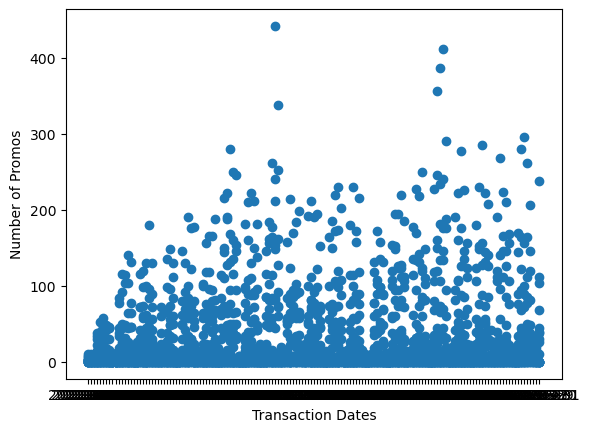

In [15]:
plt.scatter(dataset['trans_date'], dataset['promo_count'])
plt.xlabel('Transaction Dates')
plt.ylabel('Number of Promos')
plt.show()

In [16]:
max_promo = dataset[dataset.promo_count >= 400]
max_promo

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
1035,2021-03-04,12,1760.0,678.0,1836.0,18273.40,442.0,138.0,54.0,8.0,0.0,8.0,10.0,486.0,0.0,1760.0
1951,2021-04-29,8,9640.0,1482.0,9794.0,60808.36,412.0,556.0,110.0,10.0,12.0,14.0,24.0,2602.0,0.0,9640.0


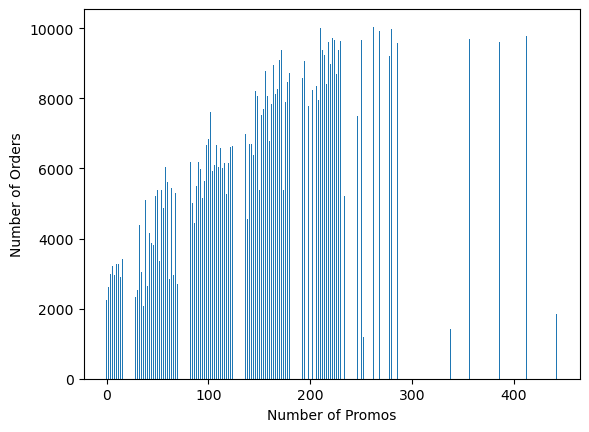

In [17]:
plt.bar(dataset['promo_count'], dataset['orders'])
plt.xlabel('Number of Promos')
plt.ylabel('Number of Orders')
plt.show()

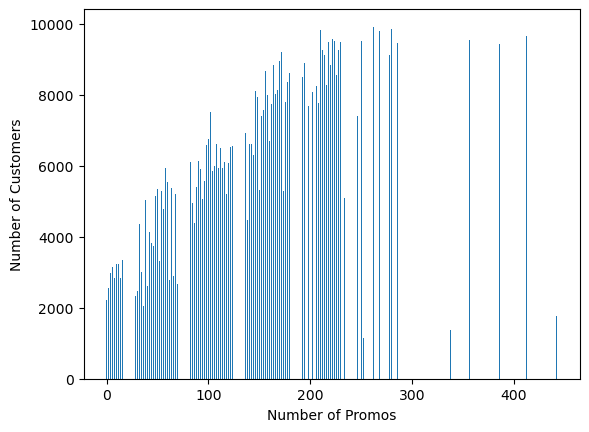

In [18]:
plt.bar(dataset['promo_count'], dataset['customers'])
plt.xlabel('Number of Promos')
plt.ylabel('Number of Customers')
plt.show()

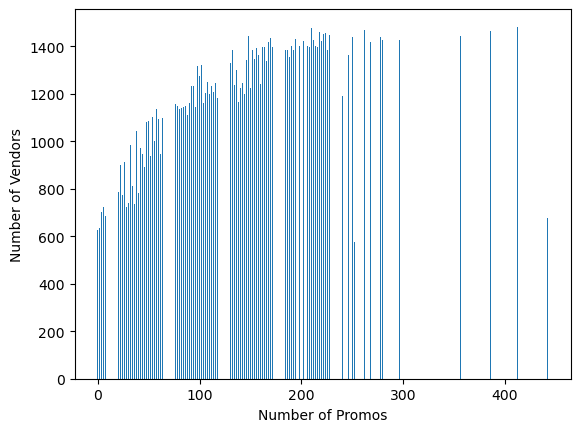

In [19]:
plt.bar(dataset['promo_count'], dataset['vendors'])
plt.xlabel('Number of Promos')
plt.ylabel('Number of Vendors')
plt.show()

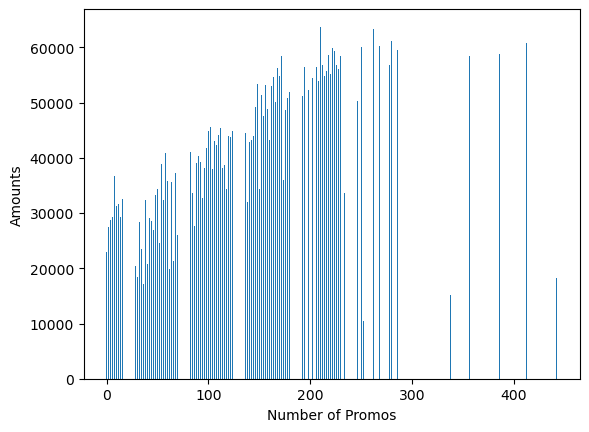

In [20]:
plt.bar(dataset['promo_count'], dataset['amount'])
plt.xlabel('Number of Promos')
plt.ylabel('Amounts')
plt.show()

In [22]:
customer = dataset[['customers', 'orders', 'amount', 'promo_count', 'Android', 'GCF', 'Macintosh', 'Tablet',
                   'Windows', 'X11', 'iPhone']]
customer

,customers,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone
0,52.0,52.0,350.70,0.0,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
1,248.0,250.0,2372.48,2.0,16.00000,4.000000,0.000000,0.000000,0.000000,2.000000,76.000000
2,584.0,594.0,6651.32,4.0,22.00000,6.000000,0.000000,0.000000,2.000000,2.000000,184.000000
3,786.0,812.0,9350.64,10.0,38.00000,26.000000,0.000000,0.000000,0.000000,2.000000,232.000000
4,894.0,924.0,10956.32,8.0,46.00000,22.000000,4.000000,0.000000,0.000000,2.000000,230.000000
...,...,...,...,...,...,...,...,...,...,...,...
2480,18.0,18.0,358.60,0.0,2.00000,6.000000,0.000000,0.000000,0.000000,0.000000,8.000000
2481,10.0,10.0,380.60,0.0,0.00000,2.000000,0.000000,0.000000,2.000000,0.000000,4.000000
2482,4.0,4.0,69.00,0.0,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2483,4.0,4.0,17.60,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


In [45]:
grouped_customers = customer.groupby(['promo_count'], as_index = False).mean()
grouped_customers.sort_values(by = ['orders'], ascending = True).head(20)

C:\Users\AMD\AppData\Local\Temp\ipykernel_1156\1085101189.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_customers = customer.groupby(['promo_count'], as_index = False).mean()


,promo_count,customers,orders,amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone
0,0.0,67.319588,68.325315,888.383482,6.428133,4.772369,0.209944,0.138913,0.335602,0.747364,35.644434
1,2.0,327.224138,333.318966,3399.638621,17.159298,9.864488,0.377123,0.218976,0.504902,1.491446,109.759154
2,4.0,752.410256,766.076923,7306.635128,38.410256,18.397436,0.679487,0.461538,0.794872,2.871795,246.500000
3,6.0,935.223140,952.842975,8811.867273,48.892562,21.074380,0.975207,0.396694,1.057851,3.355372,307.471074
118,252.0,1138.000000,1194.000000,10401.380000,70.000000,34.000000,4.000000,0.000000,2.000000,2.000000,318.000000
14,28.0,1216.105263,1236.736842,9955.678947,73.052632,28.631579,1.052632,0.631579,4.631579,4.315789,356.421053
10,20.0,1250.714286,1272.500000,10307.979286,71.071429,26.000000,1.500000,0.428571,3.714286,3.928571,371.071429
4,8.0,1270.974359,1296.871795,11342.588718,67.282051,25.384615,0.897436,0.846154,1.589744,4.512821,419.923077
18,36.0,1276.461538,1300.000000,10769.698462,77.692308,31.384615,2.461538,0.615385,7.384615,4.461538,373.230769
20,40.0,1330.363636,1353.636364,11258.994545,80.000000,28.000000,2.000000,0.909091,6.545455,3.818182,362.181818


In [24]:
customer['Android'].idxmax()

1951

In [25]:
customer['GCF'].idxmax()

2280

In [26]:
customer['Macintosh'].idxmax()

2182

In [27]:
customer['Tablet'].idxmax()

1951

In [28]:
customer['Windows'].idxmax()

1112

In [29]:
customer['X11'].idxmax()

2049

In [30]:
customer['iPhone'].idxmax()

2407

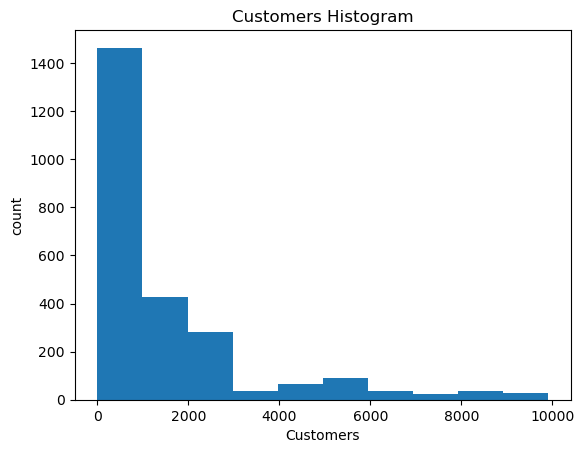

In [32]:
plt.hist(customer['customers'])
plt.xlabel('Customers')
plt.ylabel('count')
plt.title('Customers Histogram')
plt.show()

In [33]:
customer_bin = np.linspace(min(customer['customers']), max(customer['customers']), 4)
customer_bin

array([2.00000000e+00, 3.30466667e+03, 6.60733333e+03, 9.91000000e+03])

In [34]:
customer_bin_group_names = ['Low', 'Medium', 'High']

In [35]:
customer['binned_customer'] = pd.cut(customer['customers'], customer_bin, labels = customer_bin_group_names, include_lowest = True)

C:\Users\AMD\AppData\Local\Temp\ipykernel_1156\1633565966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['binned_customer'] = pd.cut(customer['customers'], customer_bin, labels = customer_bin_group_names, include_lowest = True)


In [36]:
customer['binned_customer']

0       Low
1       Low
2       Low
3       Low
4       Low
       ... 
2480    Low
2481    Low
2482    Low
2483    Low
2484    Low
Name: binned_customer, Length: 2485, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [37]:
customer['binned_customer'].value_counts()

Low       2188
Medium     203
High        94
Name: binned_customer, dtype: int64

Text(0.5, 1.0, 'Customer Bins')

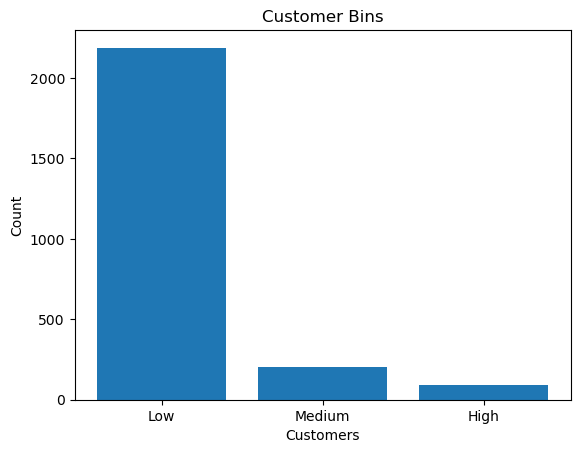

In [38]:
plt.bar(customer_bin_group_names, customer['binned_customer'].value_counts())
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Customer Bins')